In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show/Hide code"></form>''')

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib.gridspec as gridspec, math
import plotly.graph_objs as go, plotly.plotly as py, plotly.figure_factory as ff, plotly
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
import seaborn as sns
import statsmodels.formula.api as smf
init_notebook_mode(connected=True)

# Visualization of data set on Absenteeism at work

Data is obtained from $\href{https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work}{here}$. The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil. Below is the peek of data. Data has 21 columns and 740 rows. Each row corresponds to an incident of absenteeism by an employee for various reasons. One of the 21 columns (last column) is Absenteeism time in hours. It could be less than 1 hour (which is considered as 0) to 120 hours (15 days). Other columns include details about day, month and season when absenteeism was noticed, habitaul characters like smoking, drinking, dependency characters like number of children and pets, personal physical details like age, height, weight and BMI and finally transportion details like cost and distance. Data analysis would involve exploring regression to predict Absenteeism time in hours. As this project is mainly focusing on visualization, regression is not done in detail.

In [3]:
data = pd.read_csv('Absenteeism_at_work1.csv')
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2


As part of exploratory data visualization, few plots are drawn. Below are the bar plots depicting variations of number of absenteeism incidents as per day of the week, season and month. In this data set, absenteeism column (last column) refers to number of hours employees found absent. Absenteeism is considered in two ways. In first case, number of absenteeism cases and number of hours absenteeism was noticed. Below are the few plots for first case.

$\textbf{Number of absenteeism cases}$ : Employees have been absent to work the most on Monday and the least on Thursday. Similarly number of absent periods peaked in Spring. March is the month were many employees were absent from workplace.

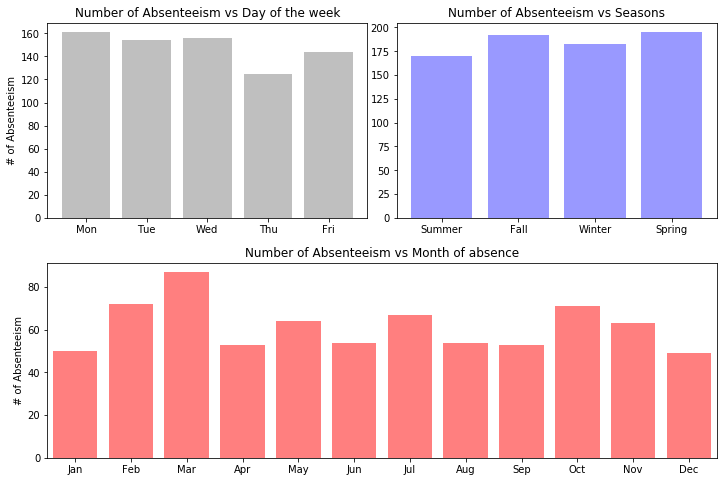

In [4]:
fig = plt.figure(1)
gridspec.GridSpec(4,4)

plt.subplot2grid((4,4), (0,0), colspan=2, rowspan=2)
plt.title('Number of Absenteeism vs Day of the week')
plt.ylabel('# of Absenteeism')
plt.bar(['Mon','Tue','Wed','Thu','Fri'],height=pd.DataFrame.sort_index(data['Day of the week'].value_counts()),color='k',alpha=0.25)

plt.subplot2grid((4,4), (0,2), colspan=2, rowspan=2)
plt.title('Number of Absenteeism vs Seasons')
plt.bar(['Summer','Fall','Winter','Spring'],height=pd.DataFrame.sort_index(data['Seasons'].value_counts()),color='b',alpha=0.4)

plt.subplot2grid((4,4), (2,0), colspan=4, rowspan=2)
plt.title('Number of Absenteeism vs Month of absence')
plt.ylabel('# of Absenteeism')
plt.bar(['None','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],height=pd.DataFrame.sort_index(data['Month of absence'].value_counts()),color='r',alpha=0.5)
plt.xlim([0.5,12.5])

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
fig.set_size_inches(w=12,h=8)

To check the relationship between Age of employees and number of absenteeism cases, an interactive plot using $\textit{plotly}$ library is drawn below. Number of absenteesim cases has peaked at two ages, 28 and 38. 

In [5]:
keys=pd.DataFrame.sort_index(data['Age'].value_counts()).index
values=np.array(pd.DataFrame.sort_index(data['Age'].value_counts()), dtype=pd.Series)
iplot({'data':[{'x':keys,'y':values}],
     'layout':go.Layout(title = 'Variation of number of absenteeism with age of employees',
                        font = dict(size=16),
                        xaxis=dict(title='Age of Employees',range=[25,60]),
                        yaxis=dict(title='Number of absenteeism')
                       )}
   )


Below are the interactive plots showing the relationship between number of absenteeism cases and employees' children and pets respectively. Most of the employees who showed absenteeism did not have children or owned pets.

In [6]:
def get_plot_data(dependent):
    plot_data =  [{
        'x': pd.Series.sort_index(dependent.value_counts()).index,
        'y': np.array(pd.Series.sort_index(dependent.value_counts()),dtype=pd.Series),
        #'hovertext':np.array(pd.Series.sort_index(dependent.value_counts()),dtype=pd.Series),
        'mode': 'markers',
        'marker': {
            'color': np.array(pd.Series.sort_index(dependent.value_counts()),dtype=pd.Series),
            'opacity':0.8,
            'size': 30,
            'showscale': True,
        }
    }]
    return plot_data
layout = go.Layout(
    autosize=False,
    width=500,
    height=500,
    xaxis=dict(
        title='Number of children employees had who showed absenteeism',
        tickmode='linear',
        ticks='outside',
        dtick=1
    ),
    yaxis=dict(
        ticks='outside'
    )
)
fig = go.Figure(data=get_plot_data(data['Son']), layout=layout)
iplot(fig)

In [7]:
layout.xaxis.title.text = 'Number of pets owned by employees who showed absenteeism'
layout.xaxis.range = [-0.5,8.5]
fig = go.Figure(data=get_plot_data(data['Pet']), layout=layout)
iplot(fig)

Absenteeism is recorded for different medical conditions. An interactive pie chart is drawn to understand the spread of absenteeism cases across different medical conditions

In [8]:
values = data['Reason for absence'].value_counts()
label = ["Parasitic diseases","Neoplasms","Blood diseases","Metabolic diseases","Mental disorders","Nervous system diseases",
         "Eye diseases","Ear diseases","Circulatory system diseases","Respiratory system diseases","Digestive system diseases",
         "Skin diseases","Musculoskeletal system diseases","Genitourinary system diseases","Pregnancy and childbirth","Perinatal period conditions",
         "Congenital malformations","Unclassified","Injury and poisoning","morbidity and mortality causes","Health services contact","Patient follow-up",
         "Medical consultation","Blood donation","Laboratory examination","Unjustified absence","Physiotherapy","Dental consultation"]
trace = go.Pie(values=values,labels=label)
iplot([trace])

$\textbf{Hours of Absenteeism}$ : In the following plots, factors influencing hours of absenteeism are considered. Below is a correlogram related to health, education and habitual factors of the employees. There is no straight forward relationship between hours of absenteeism and other variables.

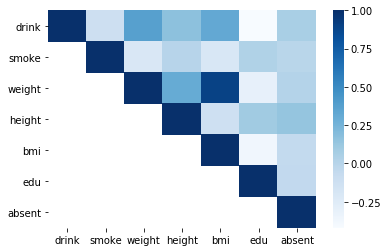

In [9]:
h_dict = {
    'drink':data['Social drinker'],
    'smoke':data['Social smoker'],
    'weight':data['Weight'],
    'height':data['Height'],
    'bmi':data['Body mass index'],
    'edu':data['Education'],
    'absent':data['Absenteeism time in hours']
}
h_df = pd.DataFrame(h_dict)
h_corr = pd.DataFrame.corr(h_df)
mask_matrix = [[True]*7 for i in range(7)]
h_map=sns.heatmap(h_corr,cmap="Blues",mask=np.tril(mask_matrix,k=-1))

A scatterplot is drawn for distance of travelling from residence to work against hours of absenteeism with color variation according to cost of travel.

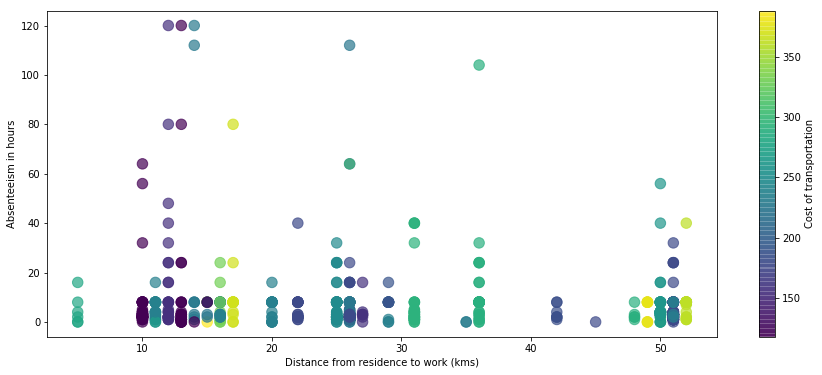

In [10]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
plt.scatter(x=data['Distance from Residence to Work'],y=data['Absenteeism time in hours'],s=110,c=data['Transportation expense'],alpha=0.7,cmap='viridis')
plt.colorbar().ax.set_ylabel('Cost of transportation')
plt.xlabel('Distance from residence to work (kms)')
plt.ylabel('Absenteeism in hours')
plt.show()

Below is an interactive scatterplot for absenteeism in hours vs Service time in years. 

In [11]:
trace = go.Scatter(
    x = data['Service time'],
    y = data['Absenteeism time in hours'],
    mode='markers',
    marker = dict(
        #color='green',
        opacity=0.6,
        colorscale='Viridis'
    )
)
layout = go.Layout(
    autosize=False,
    width=800,
    height=500,
    xaxis=dict(title='Service time in years'),
    yaxis=dict(title='Absenteeism in hours')
)
tr_data = [trace]
fig = go.Figure(tr_data,layout)
iplot(fig)

$\textbf{Regression}$: A basic multiple linear regression is done with Absenteeism in hours as response and rest 19 columns (excluding ID column) as explanatory variables. Histogram of absenteeism in hours depicts that response variable is skewed and contains lot of zero values. Hence a transformation: $\log(1+response)$ is done. Histogram is for transformed variable is close to normal. Hence normal regression can be done on transformed variable.

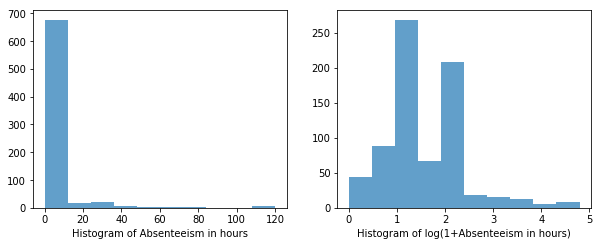

In [12]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.hist(data['Absenteeism time in hours'],bins=10,alpha=0.7)

ax2 = fig.add_subplot(222)
ax2.hist(np.log(1+data['Absenteeism time in hours']),bins=10,alpha=0.7)
ax1.set_xlabel('Histogram of Absenteeism in hours')
ax2.set_xlabel('Histogram of log(1+Absenteeism in hours)')
plt.show()

Below is the summary of fitted model. R-squared turns out to be 0.574. Below the summary is the residual plot. There is no visible pattern in the scatter plot. Hence no transformation is required further.

In [13]:
data.columns = [s.replace(' ', '_') for s in data.columns]
model_f = "np.log(1+Absenteeism_time_in_hours) ~ Pet + C(Reason_for_absence) + \
C(Month_of_absence) + C(Day_of_the_week) + C(Seasons) +  Transportation_expense + \
Distance_from_Residence_to_Work + Service_time + Age +  Hit_target +  C(Disciplinary_failure) +\
C(Education) + Son + C(Social_drinker) + C(Social_smoker) + Pet + Weight + Height + Body_mass_index"
model = smf.ols(formula=model_f, data=data)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     np.log(1 + Absenteeism_time_in_hours)   R-squared:                       0.574
Model:                                               OLS   Adj. R-squared:                  0.535
Method:                                    Least Squares   F-statistic:                     14.96
Date:                                   Mon, 21 Jan 2019   Prob (F-statistic):           7.52e-90
Time:                                           02:23:24   Log-Likelihood:                -623.26
No. Observations:                                    740   AIC:                             1371.
Df Residuals:                                        678   BIC:                             1656.
Df Model:                                             61                                         
Covariance Type:                               nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -2.4255      3.832     -0.633      0.527      -9.950       5.099
C(Reason_for_absence)[T.1]          0.7632      0.189      4.046      0.000       0.393       1.134
C(Reason_for_absence)[T.2]          1.7441      0.605      2.884      0.004       0.557       2.931
C(Reason_for_absence)[T.3]          0.8604      0.595      1.447      0.148      -0.307       2.028
C(Reason_for_absence)[T.4]          0.1448      0.437      0.331      0.740      -0.713       1.003
C(Reason_for_absence)[T.5]          0.6289      0.355      1.769      0.077      -0.069       1.327
C(Reason_for_absence)[T.6]          0.9663      0.234      4.123      0.000       0.506       1.427
C(Reason_for_absence)[T.7]          0.5878      0.190      3.089      0.002       0.214       0.961
C(Reason_for_absence)[T.8]          0.4602      0.265      1.740      0.082      -0.059       0.980
C(Reason_for_absence)[T.9]          1.8771      0.316      5.935      0.000       1.256       2.498
C(Reason_for_absence)[T.10]         0.7936      0.165      4.816      0.000       0.470       1.117
C(Reason_for_absence)[T.11]         0.4438      0.162      2.738      0.006       0.126       0.762
C(Reason_for_absence)[T.12]         1.0754      0.234      4.604      0.000       0.617       1.534
C(Reason_for_absence)[T.13]         0.8128      0.138      5.886      0.000       0.542       1.084
C(Reason_for_absence)[T.14]         0.4845      0.176      2.750      0.006       0.139       0.830
C(Reason_for_absence)[T.15]         0.5184      0.429      1.207      0.228      -0.325       1.362
C(Reason_for_absence)[T.16]        -0.3365      0.366     -0.919      0.358      -1.055       0.382
C(Reason_for_absence)[T.17]         0.6963      0.601      1.158      0.247      -0.484       1.877
C(Reason_for_absence)[T.18]         0.7325      0.169      4.330      0.000       0.400       1.065
C(Reason_for_absence)[T.19]         1.0122      0.145      6.976      0.000       0.727       1.297
C(Reason_for_absence)[T.21]         0.4429      0.267      1.657      0.098      -0.082       0.968
C(Reason_for_absence)[T.22]         0.6928      0.150      4.618      0.000       0.398       0.987
C(Reason_for_absence)[T.23]        -0.1685      0.122     -1.376      0.169      -0.409       0.072
C(Reason_for_absence)[T.24]         0.6409      0.356      1.799      0.073      -0.059       1.340
C(Reason_for_absence)[T.25]         0.0540      0.156      0.347      0.729      -0.252       0.360
C(Reason_for_absence)[T.26]         0.5581      0.156      3.584      0.00

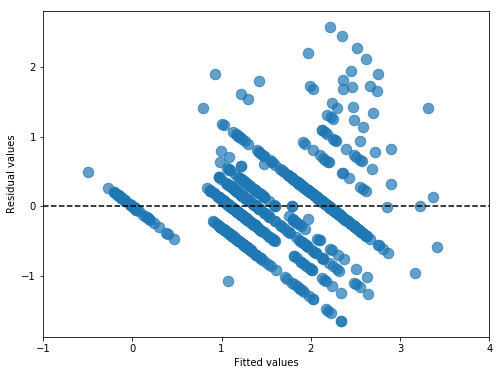

In [14]:
model_fitted_y = model_fit.fittedvalues
model_residuals = model_fit.resid
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
plt.scatter(x=model_fitted_y,y=model_residuals,s=110,alpha=0.7)
plt.plot([-1,4],[0,0],'--k')
plt.xlabel('Fitted values')
plt.xlim([-1,4])
plt.ylabel('Residual values')
plt.show()

Thus after exploratory data visualization, a normal regression was fit and a summary of regression model was also plotted. For future work, analysis of this dataset can be further improved by Machine learning classification algorithms.